In [1]:
import pandas as pd
from scipy.sparse import csr_matrix

In [2]:
question_bank = pd.read_csv('question_bank.csv',usecols=['questionId','question'])
question_bank.head()

,questionId,question
0,1,When will you hand ____ your assignment?
1,2,I am very much __________to meet you.
2,3,"If I had helped him, he ____________drowned."
3,4,"He has many friends, but _________are good ones."
4,5,"_________the rain forests is very important, i..."


In [3]:
scores = pd.read_csv('scores.csv',usecols=['userId','questionId','score'])
scores.head()

,userId,questionId,score
0,1,1,3
1,1,2,5
2,1,3,4
3,1,4,1
4,1,5,5


In [4]:
scores.shape

(5000, 3)

In [5]:
question_bank.shape

(100, 2)

In [6]:
questions_users=scores.pivot(index='questionId',columns='userId',values='score').fillna(0)
questions_users.head()

userId,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
questionId,,,,,,,,,,,,,,,,,,,,,
1,3,0,2,3,2,3,5,2,3,3,...,4,4,0,3,3,0,1,0,0,4
2,5,1,0,5,3,3,4,4,1,3,...,3,0,2,3,2,3,5,2,3,3
3,4,1,2,5,1,1,0,0,4,2,...,5,1,0,5,3,3,4,4,1,3
4,1,2,0,5,4,3,1,2,4,5,...,4,1,2,5,1,1,0,0,4,2
5,5,5,1,4,2,1,4,4,0,2,...,1,2,0,5,4,3,1,2,4,5


KeyError: 'questionId'

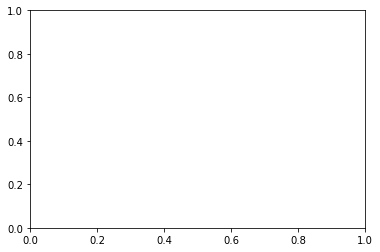

In [7]:
import matplotlib.pyplot as plt
questions_users.plot.scatter(x="questionId",y="score", alpha=0.5)

In [ ]:
mat_questions=csr_matrix(questions_users.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model= NearestNeighbors( metric ='cosine',algorithm = 'brute',n_neighbors = 10)
model.fit(mat_questions)

In [ ]:
from fuzzywuzzy import process

In [ ]:
def recomender(question,data,n):
    idx=process.extractOne(question,question_bank['question'])[2]
    print('Question Seclected :',question_bank['question'][idx],'Index : ',idx)
    print('scearching for recommendation.....')
    distance, indices = model.kneighbors(data[idx],n_neighbors=n)
    #print(distances,indices)
    for i in indices :
        print(question_bank['question'][i].where(i!=idx))
       

In [ ]:
recomender('I am very much __________to meet you.',mat_questions,10)